In [1]:
#Here i am importing some of the needed libaries as well as importing the needed data set 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Churn_Modelling.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#Here I am checking for any duplicates.
dupes = df.duplicated()
print(dupes.sum())
dupes_rows = df[df.duplicated()]
print(dupes_rows)
df.head()

#Since there are no duplicates, there is nothing to drop at this time.

0
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#Here I am checking how many different counties there are.

#df = pd.read_csv('Churn_Modelling.csv')
unique_countries = df['Geography'].unique()
print(unique_countries)
num_unique_countries = df['Geography'].nunique()
print(num_unique_countries)
# COME BACK TO THIS LATER TO SEE WHY EVEN THOUGH IT IS ECTTTT
# to avoid any bias and assuming the countires have a natural order ect I am using one hot encoding 
df = pd.get_dummies(df, columns=['Geography'])
df[['Geography_France', 'Geography_Germany', 'Geography_Spain']] = df[['Geography_France', 'Geography_Germany', 'Geography_Spain']].astype(int)
df.head()

['France' 'Spain' 'Germany']
3


,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [8]:
#here I am changing categorical data into numerical data 
#REMEBER TO RUN ALL FIRST SO THAT IT CHANGES THE GENDER TO NUMERIAL DATA 
#MALE - 0 and female - 1 
df['Gender'] = df['Gender'].map({'Male':0 , 'Female':1})
df.sample(10)
#df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5804,5805,15663933,Jamieson,625,1,35,5,86147.46,2,1,0,163440.80,1,0,1,0
212,213,15573152,Glassman,620,1,41,9,0.00,2,0,0,88852.47,0,1,0,0
5214,5215,15709474,Macnamara,740,1,57,3,113386.36,2,1,1,65121.63,1,0,1,0
8824,8825,15752388,Doyle,643,1,35,6,0.00,2,1,1,41549.64,0,0,0,1
7052,7053,15681755,Dennys,605,1,32,5,0.00,2,1,1,42135.28,0,1,0,0
527,528,15573318,Kung,610,0,26,8,0.00,2,1,0,166031.08,0,1,0,0
9087,9088,15791316,Boni,714,0,35,3,0.00,2,1,1,95623.28,0,1,0,0
9187,9188,15628863,Calabresi,601,0,38,4,60013.81,1,1,1,38020.05,0,1,0,0
9388,9389,15707138,Nagy,679,0,39,5,0.00,2,1,1,100060.54,0,0,0,1
6182,6183,15723786,Morris,709,1,37,9,0.00,2,1,0,16733.59,0,1,0,0


In [9]:
# Now I am getting rid of unnecessary columns.
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)
df.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,0,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,0,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,1,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,0,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,0,27,2,134603.88,1,1,1,71725.73,0,1,0,0


CreditScore             0
Gender               4543
Age                     0
Tenure               1035
Balance                 0
NumOfProducts        5084
HasCrCard            7055
IsActiveMember       5151
EstimatedSalary         0
Geography_France     5014
Geography_Germany    2509
Geography_Spain      2477
dtype: int64


<Axes: title={'center': 'correlation with exited coloumn'}>

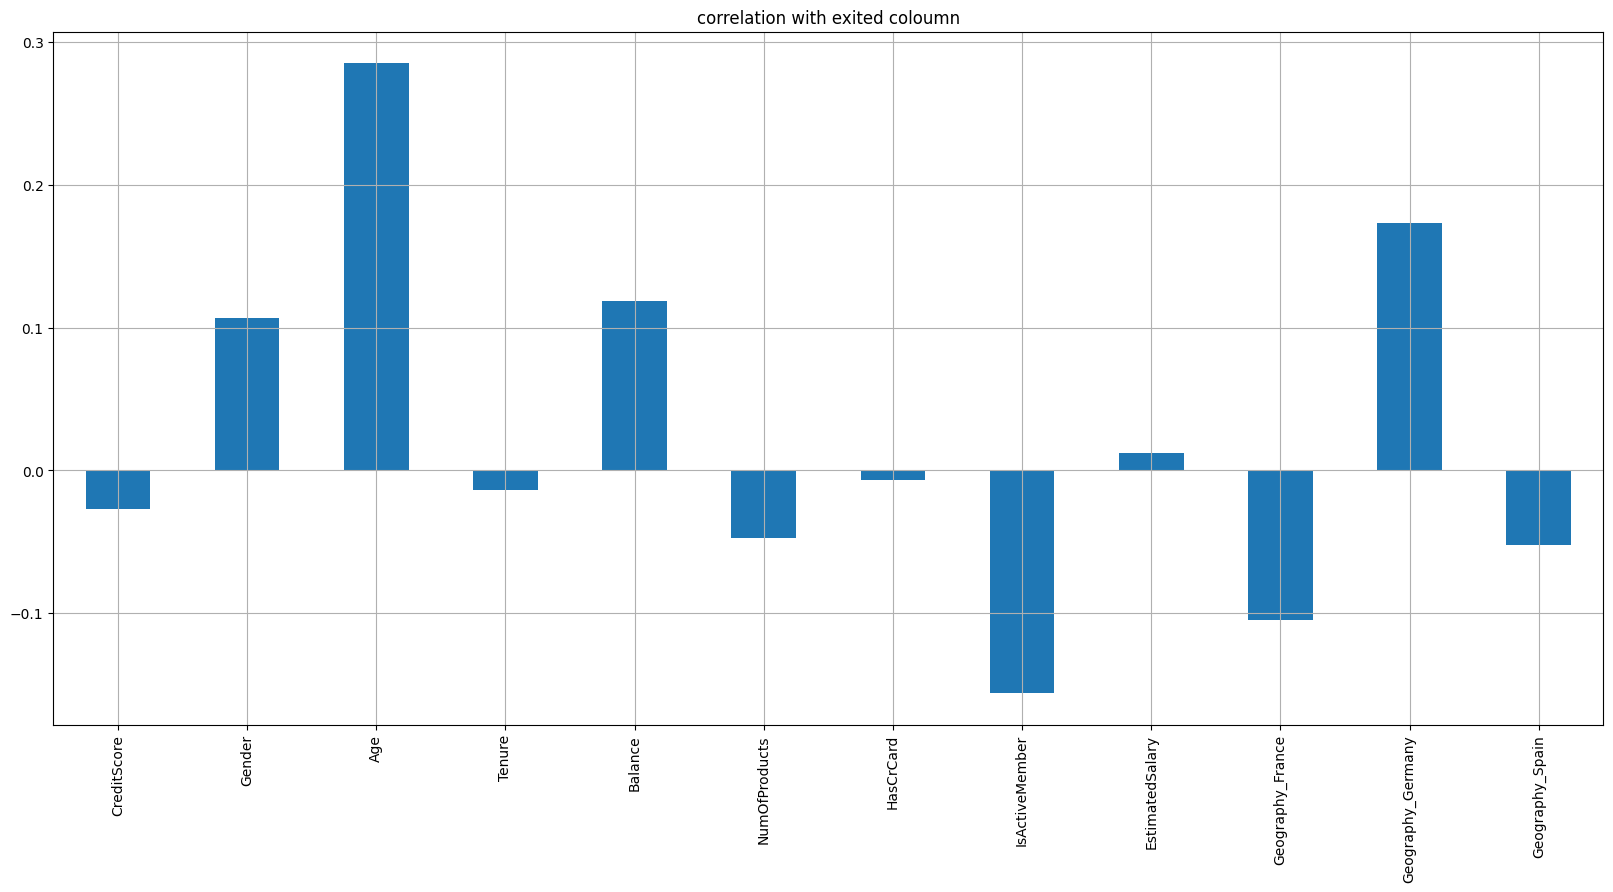

In [10]:
#Here I am creating a new dataset for 'Exited'
df_exited = df.drop(columns='Exited')
print((df_exited==1).sum())
#I am using a bar chart to assess the correlation between those that exit and all the other columns.
df_exited.corrwith(df['Exited']).plot.bar(figsize=(20,9),title='correlation with exited coloumn',rot = 90,grid = True)
#Although there is no perfect correlation, we can see that 'age' 
#has the highest level of correlation with exiting, followed by 'Germany.

In [11]:
#I am importing Scikit and starting the process
!pip install scikit-learn
X= df.drop(columns='Exited')
Y= df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\sarah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
print(X_train.shape)

(8000, 12)


In [13]:
print(X_test.shape)

(2000, 12)


In [14]:
#standard scaler is used to scale the numreical features before fitting it in the model. 
print(X_train.dtypes)

#object_columns = X_train.select_dtypes(include='object').columns
#print(X_train[object_columns].head())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object


In [15]:
X_train

array([[ 1.03360928,  1.10665898,  0.00825566, ..., -0.996257  ,
        -0.58601101,  1.74954671],
       [ 0.78536369, -0.90362073, -0.46826153, ...,  1.00375706,
        -0.58601101, -0.57157662],
       [-0.64204841,  1.10665898,  2.39084161, ...,  1.00375706,
        -0.58601101, -0.57157662],
       ...,
       [-0.69376624,  1.10665898, -0.75417184, ...,  1.00375706,
        -0.58601101, -0.57157662],
       [ 0.29921609, -0.90362073, -0.27765465, ...,  1.00375706,
        -0.58601101, -0.57157662],
       [-1.66606145,  1.10665898,  1.24720035, ..., -0.996257  ,
         1.70645259, -0.57157662]])

In [16]:
# Now I am using logistic regression to train the model.
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=5).fit(X_train, y_train)
y_pred= clf.predict(X_test)


In [17]:
#Testing the accuracy of the model using differnt metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
class_r = classification_report(y_test, y_pred)
print("Classifi Report:")
print(class_r)

Accuracy: 0.809
Confusion Matrix:
[[1538   57]
 [ 325   80]]
Classifi Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.20      0.30       405

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [18]:
#INSIGHT INTO INFOMATION ABOVE
#This is for class 0 (customers who did not churn)

#The Precision value is 0.83
#Precision is the ratio of true positives to all positive predictions.
#For class 0, it means that when the model predicted a customer would not churn, it was correct 83% of the time.
#The Recall value is  0.96
#Recall  is the ratio of true positives in relation actual positives.
#For class 0, the model correctly identified 96% of all the customers who actually did not churn.
#The F1-Score is 0.89
#F1-score is the harmonic mean of precision and recall. It gives a balance between precision and recall.
#For class 0, the F1-score of 0.89 shows strong performance for customers who did not churn.

#This is for class 1 (customers who did churn)

#The Precision value is  0.58
#When the model predicted a customer would churn, it was correct only 58% of the time. 
#This is lower than the precision for class 0.
#The Recall value is  0.20
#The model only correctly identified 20% of the actual churners.
#This indicates that the model missed a lot of actual churners (325 false negatives).
#The F1-Score value is 0.30
#The F1-score is quite low, indicating that the model struggles to balance between precision 
#and recall for predicting customer churn.

In [19]:
#BECAUSE OF THE PRECISION VALUES BEING LOW FOR CLASS 1 the class weight may need to be balanced 
clf_2 = LogisticRegression(random_state=5, class_weight='balanced')
clf_2.fit(X_train, y_train)
y_pred_2= clf_2.predict(X_test)

accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"Accuracy: {accuracy_2}")
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)
print("Confusion Matrix:")
print(conf_matrix_2)
class_r_2 = classification_report(y_test, y_pred_2)
print("Classifi Report:")
print(class_r_2)

# Since that didnt change much for class 1 percision value instead made it worse I will instead use another
#prediction model

Accuracy: 0.7185
Confusion Matrix:
[[1156  439]
 [ 124  281]]
Classifi Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1595
           1       0.39      0.69      0.50       405

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.72      0.74      2000



In [20]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

rf_clf = RandomForestClassifier(random_state=5)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(class_report_rf)
#I am going to keep the model as it is as there as there has been significant improvement already 

Accuracy: 0.8595
Confusion Matrix:
[[1536   59]
 [ 222  183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1595
           1       0.76      0.45      0.57       405

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [21]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [24]:
df.tail()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0
9999,792,1,28,4,130142.79,1,1,0,38190.78,0,1,0,0


In [27]:
# Now i will be able to predict who is likely to churn or not based on a example data set 
sample_cust_df = pd.DataFrame({
    'CreditScore': [600, 750, 500], 
    'Gender': [1, 2, 1],
    'Age': [34, 45, 56],
    'Tenure' : [3, 12, 9],
    'Balance': [590, 9479, 78533],
    'NumOfProducts': [2, 1, 1],
    'HasCrCard': [1, 0, 1],
    'IsActiveMember': [1, 0, 1],
    'EstimatedSalary': [50000, 69089, 100000],
    'Geography_France': [1, 0, 0],
    'Geography_Germany': [0, 0, 1],
    'Geography_Spain': [0, 1, 0],
})

sample_cust_scaled = scaler.transform(sample_cust_df)

# Using the trained Random Forest model to predict churn
churn_predictions = rf_clf.predict(sample_cust_scaled)


for i, prediction in enumerate(churn_predictions):
    if prediction == 1:
        print(f"Customer {i+1}: Will churn")
    else:
        print(f"Customer {i+1}: Will not churn") 



Customer 1: Will not churn
Customer 2: Will churn
Customer 3: Will not churn
